In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('datasets/Canada.xlsx',
                  sheet_name = 'Canada by Citizenship',
                  skiprows = range(20),
                  skipfooter = 2,
                  engine = 'openpyxl')
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

## Elimino columnas

In [4]:
df.drop({'AREA','REG', 'Type','DEV','Coverage','Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'},
        axis = 1,
        inplace = True)

df.columns

Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

## Cambio de nombre 
ojo con {}

In [5]:
df.rename(columns = {'OdName':'Country',
                     'AreaName' : 'Continent',
                     'RegName': 'Region'},
          inplace = True)
df.columns              

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

## SUMA DE RENGLONES DESDE COLUNMA 4 HASTA FINAL
AXIS = 1 COLUMNA
ILOC PARA IDENTIFICAR CON NUMERO 

In [6]:
df['Total']= df.iloc[:,4:].sum(axis = 1)
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


In [7]:
##Hizo listas con comlumas 
##para despues graficar 

##Hizo su index country

In [8]:
df.columns = list(map(str,
                     df.columns
                     )
                 )
#df.columns
fav_years = list(map(str,
                    range(1980,2014)
                    )
                )

df.set_index('Country',
             inplace = True)


df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


## Creo que quito index

In [9]:
df.index.name = None
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


## Ver que estilos tenemos

In [10]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Grafico las personas en haiti 

In [11]:
haiti = df.loc['Haiti',fav_years]

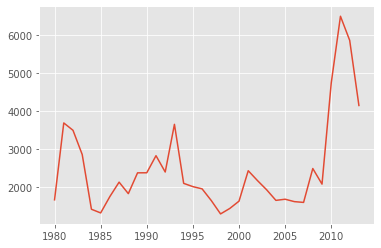

In [12]:
haiti.plot()

In [13]:
## Graficar dos paises 

Text(0.5, 0, 'Years')

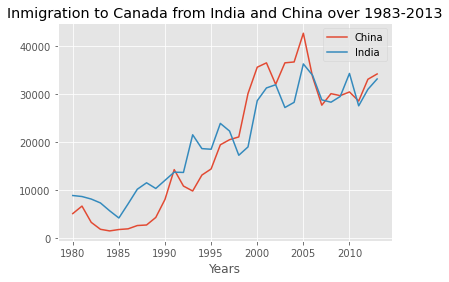

In [14]:
dfCI = df.loc[['China','India'],
             fav_years]

dfCI = dfCI.transpose()
dfCI.plot()

plt.title('Inmigration to Canada from India and China over 1983-2013')
plt.xlabel('Years')

In [ ]:
## CHECAR DESDE AQUI 

In [19]:
df_top = df.sort_values(by = 'Total',
                       ascending = False,
                       axis = 0,
                       )

In [ ]:
df_top.drop({'Total', 'Unknown'},
        axis = 0,
        inplace = True)

##LO CORRI DOS VECES POR ESO NO SIRVE

In [20]:
df_top5 = df_top.head(5)
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Total,World,World,World,143137.0,128641.0,121175.0,89185.0,88272.0,84346.0,99351.0,...,262242.0,251640.0,236753.0,247244.0,252170.0,280687.0,248748.0,257903.0,259021.0,6924212.0
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0


In [21]:
df_top5 = df_top[fav_years]
df_top5 = df_top.transpose()
df_top5

,Total,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Continent,World,Asia,Asia,Europe,World,Asia,Asia,Northern America,Asia,Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,World,Southern Asia,Eastern Asia,Northern Europe,World,South-Eastern Asia,Southern Asia,Northern America,Southern Asia,Southern Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DevName,World,Developing regions,Developing regions,Developed regions,World,Developing regions,Developing regions,Developed regions,Developing regions,Developing regions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,143137,8880,5123,22045,44000,6051,978,9378,1172,185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,128641,8670,6682,24796,18078,5921,972,10030,1429,371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,121175,8147,3308,20620,16904,5249,1201,9074,1822,290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,89185,7338,1863,10015,13635,4562,900,7100,1592,197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,88272,5704,1527,10170,14855,3801,668,6661,1977,1086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,84346,4211,1816,9564,14368,3150,514,6543,1648,845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,99351,7150,1960,9470,13303,4166,691,7074,1794,1838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_top5.plot()
#NUNCA CORRIO

KeyError: nan

In [ ]:
area_chart = df_top5.plot(kind = 'area',
                         alpha = 0.5,
                         figsize = (20,10))

In [ ]:
df_top5 = df_top5.tranpose()
df_top5.columns
x = df_top5['2011'].head()
x
#count, bin_egdes = np.histogram(x) NUNCA LE CORRIO AL PROFE
df_top5['2011'].plot(kind = 'hist',
                     figsize = (20,10))

In [ ]:
df_top5 = df_top5['2011']

In [ ]:
df_top5.plot(kind = 'barth',
            figsize = (20,10),
            color = 'y',
            alpha = 0.5)
for index, value in enumerate(df_top5):
    label = format(int(value),',')
    plt.annotate(labe,
                 xy = value - 2500, index - 0.1),
                 color = 

In [16]:
df_top5.describe()

NameError: name 'df_top5' is not defined